In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, Column, vstack, join

import palettable

cmap_1 = palettable.colorbrewer.sequential.Blues_7_r
cmap_2 = palettable.colorbrewer.sequential.OrRd_7_r
cmap_3 = palettable.colorbrewer.sequential.YlGn_7_r
cmap_4 = palettable.colorbrewer.sequential.Purples_7_r

cmap_list = [cmap_1, cmap_2, cmap_3, cmap_4]

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]

In [2]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [3]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Scatter trends for different halo mass proxies

- Test different aperture stellar masses and outerskirt stellar masses

In [4]:
topn_massive = pickle.load(
    open(os.path.join(res_dir, 'topn_galaxies_sum.pkl'), 'rb'))

In [10]:
# Second group: aperture stellar masses
m10_bins = topn_massive['logm_10']
m30_bins = topn_massive['logm_30']
m50_bins = topn_massive['logm_50']
m75_bins = topn_massive['logm_75']
m100_bins = topn_massive['logm_100']
m150_bins = topn_massive['logm_150']
m300_bins = topn_massive['logm_extra_300']

# Third group; outer envelope stellar mass
m10_100_bins = topn_massive['logm_10_100']
m30_100_bins = topn_massive['logm_30_100']
m50_100_bins = topn_massive['logm_50_100']
m75_150_bins = topn_massive['logm_75_150']
m3_5_re_bins = topn_massive['logm_3_5_r50']

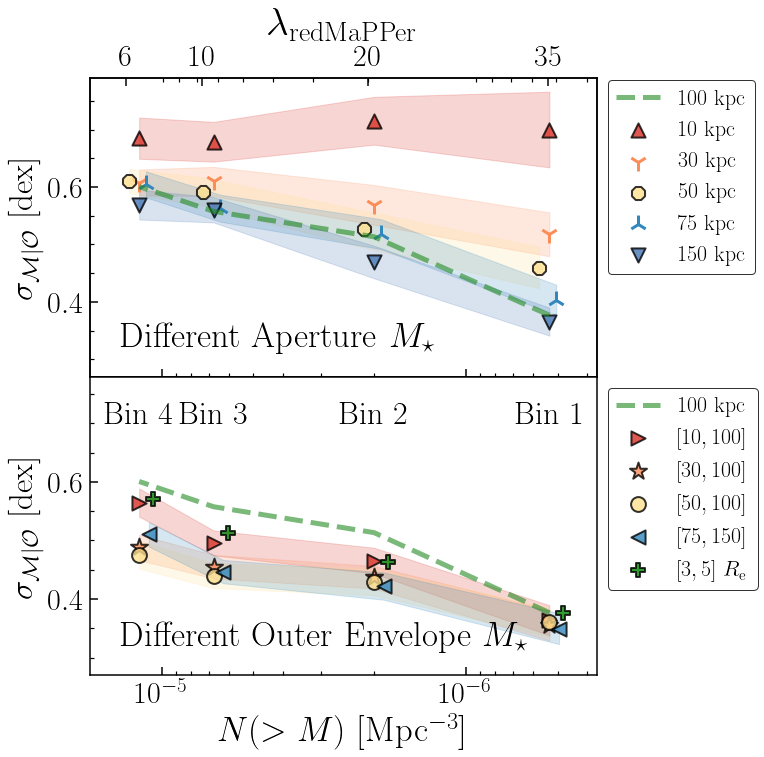

In [22]:
fig = plt.figure(figsize=(10.5, 10.5))
fig.subplots_adjust(left=0.11, right=0.78, bottom=0.11, top=0.90,
                    wspace=0.00, hspace=0.00)

# ----- Different Apertures ----- #
ax1 = fig.add_subplot(211)
ax1.set_xscale("log", nonpositive='clip')
ax1.grid(False)

colors = ['#d73027', '#fc8d59', '#fee090', '#3288bd', '#4575b4']

# 10 kpc
ax1.fill_between(
    m100_bins['rho_bin'], m10_bins['sig_med_bt'] - m10_bins['sig_err_bt'],
    m10_bins['sig_med_bt'] + m10_bins['sig_err_bt'], 
    color=colors[0], alpha=0.2
)
# 30 kpc
ax1.fill_between(
    m100_bins['rho_bin'], m30_bins['sig_med_bt'] - m30_bins['sig_err_bt'],
    m30_bins['sig_med_bt'] + m30_bins['sig_err_bt'], 
    color=colors[1], alpha=0.2
)

# 50 kpc
ax1.fill_between(
    m100_bins['rho_bin'] * 1.08, m50_bins['sig_med_bt'] - m50_bins['sig_err_bt'],
    m50_bins['sig_med_bt'] + m50_bins['sig_err_bt'], 
    color=colors[2], alpha=0.2
)

# 75 kpc
ax1.fill_between(
    m100_bins['rho_bin'] * 0.95, m75_bins['sig_med_bt'] - m75_bins['sig_err_bt'],
    m75_bins['sig_med_bt'] + m75_bins['sig_err_bt'], 
    color=colors[3], alpha=0.2
)

# 300 kpc
ax1.fill_between(
    m100_bins['rho_bin'], m150_bins['sig_med_bt'] - m150_bins['sig_err_bt'],
    m150_bins['sig_med_bt'] + m150_bins['sig_err_bt'], 
    color=colors[4], alpha=0.2
)

ax1.plot(m100_bins['rho_bin'], m100_bins['sig_med_bt'], linewidth=5.0, linestyle='--', alpha=0.6, 
         color='forestgreen', label=r'$100\ \rm kpc$')

ax1.scatter(m100_bins['rho_bin'], m10_bins['sig_med_bt'], 
            s=200, marker='^', alpha=0.8, facecolor=colors[0], edgecolor='k', 
            linewidth=2.0, label=r'$10\ \rm kpc$')

ax1.scatter(m100_bins['rho_bin'], m30_bins['sig_med_bt'], 
            s=320, marker='1', alpha=1.0, facecolor=colors[1], edgecolor='none', 
            linewidth=3.0, label=r'$30\ \rm kpc$')

ax1.scatter(m100_bins['rho_bin'] * 1.08, m50_bins['sig_med_bt'], 
            s=200, marker='8', alpha=0.8, facecolor=colors[2], edgecolor='k', 
            linewidth=2.0, label=r'$50\ \rm kpc$')

ax1.scatter(m100_bins['rho_bin'] * 0.95, m75_bins['sig_med_bt'], 
            s=320, marker='2', alpha=1.0, facecolor=colors[3], edgecolor='none', 
            linewidth=3.0, label=r'$75\ \rm kpc$')

ax1.scatter(m100_bins['rho_bin'], m150_bins['sig_med_bt'], 
            s=200, marker='v', alpha=0.8, facecolor=colors[4], edgecolor='k', 
            linewidth=2.0, label=r'$150\ \rm kpc$')

ax1.legend(bbox_to_anchor=(1, 1.03), bbox_transform=ax1.transAxes, fontsize=22, edgecolor='k')

ax1.text(0.06, 0.10, r'${\rm Different\ Aperture}\ M_{\star}$', fontsize=35, transform=ax1.transAxes)

ax1.set_xlim(np.max(m100_bins['rho_bin']) * 1.45, np.min(m100_bins['rho_bin']) * 0.70)
ax1.set_ylim(0.27, 0.79)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
    
_ = ax1.set_ylabel(r'$\sigma_{\mathcal{M}|\mathcal{O}}\ [\rm dex]$', fontsize=33)

# Secondary axis on top
ax_top = ax1.twiny()
ax_top.grid(False)
ax_top.set_xscale("log", nonpositive='clip')
ax_top.set_xlim(np.max(m100_bins['rho_bin']) * 1.3, np.min(m100_bins['rho_bin']) * 0.7)
ax_top.set_xticks(list(m100_bins['rho_bin']))
ax_top.set_xticklabels([r'${:d}$'.format(l) for l in [35, 20, 10, 6]], fontsize=30)
_ = ax_top.set_xlabel(r'$\lambda_{\rm redMaPPer}$', fontsize=40, labelpad=10)


# ----- Different outer envelope map ----- #
ax2 = fig.add_subplot(212)
ax2.set_xscale("log", nonpositive='clip')
ax2.grid(False)

# 10 - 100 kpc
ax2.fill_between(
    m100_bins['rho_bin'], m10_100_bins['sig_med_bt'] - m10_100_bins['sig_err_bt'],
    m10_100_bins['sig_med_bt'] + m10_100_bins['sig_err_bt'], 
    color=colors[0], alpha=0.2
)
# 30 - 100 kpc
ax2.fill_between(
    m100_bins['rho_bin'], m30_100_bins['sig_med_bt'] - m30_100_bins['sig_err_bt'],
    m30_100_bins['sig_med_bt'] + m30_100_bins['sig_err_bt'], 
    color=colors[1], alpha=0.2
)

# 50 - 100 kpc
ax2.fill_between(
    m100_bins['rho_bin'], m50_100_bins['sig_med_bt'] - m50_100_bins['sig_err_bt'],
    m50_100_bins['sig_med_bt'] + m50_100_bins['sig_err_bt'], 
    color=colors[2], alpha=0.2
)

# 50 - 100 kpc
ax2.fill_between(
    m100_bins['rho_bin'] * 0.93, m75_150_bins['sig_med_bt'] - m75_150_bins['sig_err_bt'],
    m75_150_bins['sig_med_bt'] + m75_150_bins['sig_err_bt'], 
    color=colors[3], alpha=0.2
)

ax2.plot(m100_bins['rho_bin'], m100_bins['sig_med_bt'], linewidth=5.0, linestyle='--', alpha=0.6, 
         color='forestgreen', label=r'$100\ \rm kpc$')

ax2.scatter(m100_bins['rho_bin'], m10_100_bins['sig_med_bt'], 
            s=200, marker='>', alpha=0.8, facecolor=colors[0], edgecolor='k', 
            linewidth=2.0, label=r'$[10,100]$')

ax2.scatter(m100_bins['rho_bin'], m30_100_bins['sig_med_bt'], 
            s=320, marker='*', alpha=0.8, facecolor=colors[1], edgecolor='k', 
            linewidth=2.0, label=r'$[30, 100]$')

ax2.scatter(m100_bins['rho_bin'], m50_100_bins['sig_med_bt'], 
            s=220, marker='o', alpha=0.8, facecolor=colors[2], edgecolor='k', 
            linewidth=2.0, label=r'$[50, 100]$')

ax2.scatter(m100_bins['rho_bin'] * 0.93, m75_150_bins['sig_med_bt'], 
            s=200, marker='<', alpha=0.8, facecolor=colors[3], edgecolor='k', 
            linewidth=2.0, label=r'$[75, 150]$')

ax2.scatter(m100_bins['rho_bin'] * 0.90, m3_5_re_bins['sig_med_bt'], 
            s=200, marker='P', alpha=0.8, facecolor='g', edgecolor='k', 
            linewidth=2.0, label=r'$[3, 5]\ R_{\rm e}$')

ax2.legend(bbox_to_anchor=(1, 1), bbox_transform=ax2.transAxes, fontsize=22, edgecolor='k')

ax2.text(0.06, 0.10, r'${\rm Different\ Outer\ Envelope}\ M_{\star}$', fontsize=35, transform=ax2.transAxes)

ax2.text(m100_bins['rho_bin'][0], 0.7, r'$\rm Bin\ 1$', fontsize=32, horizontalalignment='center')
ax2.text(m100_bins['rho_bin'][1], 0.7, r'$\rm Bin\ 2$', fontsize=32, horizontalalignment='center')
ax2.text(m100_bins['rho_bin'][2], 0.7, r'$\rm Bin\ 3$', fontsize=32, horizontalalignment='center')
ax2.text(m100_bins['rho_bin'][3], 0.7, r'$\rm Bin\ 4$', fontsize=32, horizontalalignment='center')

ax2.set_xlim(np.max(m100_bins['rho_bin']) * 1.45, np.min(m100_bins['rho_bin']) * 0.70)
ax2.set_ylim(0.27, 0.78)

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
    
_ = ax2.set_ylabel(r'$\sigma_{\mathcal{M}|\mathcal{O}}\ [\rm dex]$', fontsize=33)
_ = ax2.set_xlabel(r'$N (>M)\ [\rm Mpc^{-3}]$', fontsize=35)

In [16]:
fig.savefig(os.path.join(fig_dir, 'fig_5.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_5.pdf'), dpi=120)